# Iris Classification Exercise

ML exercise using things learned from Google's Crash Course (https://developers.google.com/machine-learning/crash-course) and following the multiclass classification example in Chollet's *Deep Learning with Python*. 

Iris data retrieved from https://archive.ics.uci.edu/ml/datasets/iris.

We create a classification model for iris flowers of three possible species given their sepal length, sepal width, petal length, and petal width.

### Import packages and data

In [42]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Load the dataframe with 150 total flowers. We set the values of the `species` column in the main dataframe to be represented categorically, and create a one hot encoding for them. The rows in the dataframe are permuted, since the original data is ordered by species.

In [43]:
from tensorflow.keras.utils import to_categorical

col_names = [
    "sepal_length", "sepal_width", "petal_length", "petal_width", "species"
]
categorical_species = {
    "species" : {
        "Iris-setosa" : 0,
        "Iris-versicolor" : 1,
        "Iris-virginica" : 2
    }
}

main_df = pd.read_csv("iris.data", header=None, names=col_names)
main_df = main_df.replace(categorical_species)
main_df = main_df.reindex(np.random.permutation(main_df.index))

one_hot_species = to_categorical(main_df["species"])

### Create test and validation set

We create training and test data. 125 are set as training data, and 25 are left for validation.

In [44]:
X_train, X_test = \
        np.array(main_df.iloc[:125, :4].values.tolist()), \
        np.array(main_df.iloc[125:, :4].values.tolist())

Y_train, Y_test = \
        np.array(one_hot_species[:125]), \
        np.array(one_hot_species[125:])

Note the shape of our input vectors in `X` and one hot encoded vectors `Y`:

In [45]:
print(X_train[:1])
print(Y_train[:1])

[[5.1 3.8 1.6 0.2]]
[[1. 0. 0.]]


### Build the model

Use `Keras` to create a simple sequential model with 20 dimensional intermediate vectors, and a final layer outputting a 3D vector for the one-hot encoded species of iris. Compile the model using the `rmsprop` gradient descent optimization technique, and categorical crossentropy as our loss function. 

In [46]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Dense(20, activation="relu", input_shape = (4,)))
model.add(layers.Dense(3, activation="softmax"))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

We fit the model to our data.

In [47]:
history = model.fit(
    X_train, Y_train,
    epochs=200,
    batch_size=10,
    validation_data=(X_test, Y_test))

Epoch 1/200
13/13 [==============================] - 0s 10ms/step - loss: 1.1984 - accuracy: 0.3520 - val_loss: 1.2061 - val_accuracy: 0.2400
Epoch 2/200
13/13 [==============================] - 0s 2ms/step - loss: 1.1108 - accuracy: 0.3520 - val_loss: 1.1070 - val_accuracy: 0.2400
Epoch 3/200
13/13 [==============================] - 0s 2ms/step - loss: 1.0688 - accuracy: 0.3920 - val_loss: 1.0573 - val_accuracy: 0.3600
Epoch 4/200
13/13 [==============================] - 0s 3ms/step - loss: 1.0371 - accuracy: 0.5280 - val_loss: 1.0302 - val_accuracy: 0.3600
Epoch 5/200
13/13 [==============================] - 0s 3ms/step - loss: 1.0107 - accuracy: 0.5600 - val_loss: 0.9926 - val_accuracy: 0.6800
Epoch 6/200
13/13 [==============================] - 0s 2ms/step - loss: 0.9862 - accuracy: 0.7120 - val_loss: 0.9676 - val_accuracy: 0.8400
Epoch 7/200
13/13 [==============================] - 0s 3ms/step - loss: 0.9659 - accuracy: 0.7920 - val_loss: 0.9438 - val_accuracy: 0.8400
Epoch 8/200


Epoch 59/200
13/13 [==============================] - 0s 3ms/step - loss: 0.3286 - accuracy: 0.9760 - val_loss: 0.3407 - val_accuracy: 0.8800
Epoch 60/200
13/13 [==============================] - 0s 2ms/step - loss: 0.3204 - accuracy: 0.9920 - val_loss: 0.3348 - val_accuracy: 0.8400
Epoch 61/200
13/13 [==============================] - 0s 3ms/step - loss: 0.3155 - accuracy: 0.9760 - val_loss: 0.3286 - val_accuracy: 0.8400
Epoch 62/200
13/13 [==============================] - 0s 3ms/step - loss: 0.3112 - accuracy: 0.9760 - val_loss: 0.3255 - val_accuracy: 0.8400
Epoch 63/200
13/13 [==============================] - 0s 2ms/step - loss: 0.3032 - accuracy: 0.9840 - val_loss: 0.3289 - val_accuracy: 0.8800
Epoch 64/200
13/13 [==============================] - 0s 3ms/step - loss: 0.3016 - accuracy: 0.9680 - val_loss: 0.3237 - val_accuracy: 0.8800
Epoch 65/200
13/13 [==============================] - 0s 3ms/step - loss: 0.2960 - accuracy: 0.9920 - val_loss: 0.3175 - val_accuracy: 0.8800
Epoch 

13/13 [==============================] - 0s 2ms/step - loss: 0.1342 - accuracy: 0.9920 - val_loss: 0.2071 - val_accuracy: 0.9200
Epoch 117/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1328 - accuracy: 0.9840 - val_loss: 0.2016 - val_accuracy: 0.9200
Epoch 118/200
13/13 [==============================] - 0s 3ms/step - loss: 0.1304 - accuracy: 0.9920 - val_loss: 0.1981 - val_accuracy: 0.9200
Epoch 119/200
13/13 [==============================] - 0s 3ms/step - loss: 0.1302 - accuracy: 0.9920 - val_loss: 0.2052 - val_accuracy: 0.9200
Epoch 120/200
13/13 [==============================] - 0s 3ms/step - loss: 0.1290 - accuracy: 0.9920 - val_loss: 0.2013 - val_accuracy: 0.9200
Epoch 121/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1251 - accuracy: 0.9920 - val_loss: 0.2105 - val_accuracy: 0.8800
Epoch 122/200
13/13 [==============================] - 0s 3ms/step - loss: 0.1239 - accuracy: 0.9920 - val_loss: 0.1952 - val_accuracy: 0.9200
Epoch 123/200

13/13 [==============================] - 0s 3ms/step - loss: 0.0726 - accuracy: 0.9920 - val_loss: 0.1714 - val_accuracy: 0.9200
Epoch 174/200
13/13 [==============================] - 0s 3ms/step - loss: 0.0718 - accuracy: 0.9840 - val_loss: 0.1639 - val_accuracy: 0.9600
Epoch 175/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0737 - accuracy: 0.9920 - val_loss: 0.1737 - val_accuracy: 0.9200
Epoch 176/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0716 - accuracy: 0.9920 - val_loss: 0.2089 - val_accuracy: 0.9200
Epoch 177/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0717 - accuracy: 0.9920 - val_loss: 0.2010 - val_accuracy: 0.9200
Epoch 178/200
13/13 [==============================] - 0s 3ms/step - loss: 0.0717 - accuracy: 0.9920 - val_loss: 0.1814 - val_accuracy: 0.9200
Epoch 179/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0697 - accuracy: 0.9920 - val_loss: 0.2084 - val_accuracy: 0.9200
Epoch 180/200

### Visualize training and validation loss

Plot the training and validation loss against the number of epochs. Playing around with the model, around 200 epochs the loss began to be constant. 

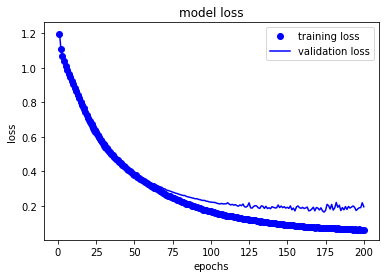

In [48]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


### Cool!

In some permutations, training loss seems to go significantly below validation loss, meaning there is probably some overfitting to the training data occuring. Fortunately, the validation loss seems to converge. Some regularization could be added to the model to fix this.